<a href="https://colab.research.google.com/github/alinakhaee/stable-matching/blob/master/Ali_Nakhaee_Sharif_Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset
in this section I impoerted the librarires and loaded the MNIST dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255

print("Training matrix shape", X_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
Training matrix shape (60000, 784)


# K-Means 
I used the `sklearn` library for the K-means algorithm. <br>
This algorithm takes the `n_cluster` parameter which is the number of K. (our desired number for clusters) <br>

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics

def do_k_means(k_means, labels = y_train, print_result = True):
    k_means.fit(X_train)
    cluster_labels = infer_cluster_labels(k_means, labels) # تابعی برای پیدا کردن لیبل هر کلاستر
    data_labels = k_means.labels_
    predicted_labels = infer_data_labels(data_labels, cluster_labels) # تابعی برای پیدا کردن لیبل پیشبینی شده برای هر داده بعد از انجام کلاسترینگ

    if print_result:
        print('Predicted labels: {}'.format(predicted_labels[:30]))
        print('Actual labels:    {}'.format(y_train[:30]))
        print('Purity: {}'.format(metrics.accuracy_score(y_train, predicted_labels)))
        print('Rand Index: {}'.format(metrics.adjusted_rand_score(y_train, predicted_labels)))

    return (metrics.accuracy_score(y_train, predicted_labels), metrics.adjusted_rand_score(y_train, predicted_labels))

The above function is for performing K-means algorithm. <br>
Since there are two different K-means implemetation in `sklearn`, then I define the `k_means` as a parameter. <br>
The implementation for the inner functions are in the next code sections.

In [ ]:
def infer_cluster_labels(k_means, actual_labels):
    # لیبلی که در هر کلاستر بیشتر از بقیه تکرار شده را به عنوان لیبل آن کلاستر در نظر میگیریم
    inferred_labels = {}
    for i in range(k_means.n_clusters):
        labels = []
        index = np.where(k_means.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

The above function is for finding the label of each cluster. <br>
The clustering algorithm finds `n_cluster` number of clusters and it numerate them in a random way. <br>
For example cluster number 0 is not the actual number 0. So we have to infer the cluster label. <br>
To do this I check all the clusters, and I assume that the label that was repeated mostly in a cluster, is the label of that cluster. 

In [ ]:
def infer_data_labels(data_labels, cluster_labels):
    predicted_labels = np.zeros(len(data_labels)).astype(np.uint8)
    for i, cluster in enumerate(data_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

The above function finds out that which label we have assigned to each data <br>
The output of clustering is like `[1, 2, ...]` and it means that the first data is assigned to cluster number 1. <br>
since we have determined the actual label of each cluster, so we can understand that which label we have predicted for our datas. <br>
This function returns an array like `[5, 0, ...]` which means that we have predicted that our first data is number 5.

In [ ]:
from sklearn.cluster import KMeans

k_means = MiniBatchKMeans(n_clusters=10)
do_k_means(k_means)
print()
k_means = KMeans(n_clusters=10)
do_k_means(k_means)

30 first datas after clustering:  [3 2 9 0 7 5 1 3 1 0 3 0 6 8 1 7 5 0 4 0 9 2 0 0 4 3 7 3 7 0]
Predicted labels: [8 0 4 1 7 2 1 8 1 1 8 1 3 6 1 7 2 1 6 1 4 0 1 1 6 8 7 8 7 1]
Actual labels:    [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
Purity: 0.54985
Rand Index: 0.3565295092055206

30 first datas after clustering:  [9 8 4 1 7 0 6 9 6 7 3 1 3 5 6 7 0 9 5 7 4 8 7 1 6 0 4 3 7 1]
Predicted labels: [8 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 6 7 4 0 7 1 1 2 4 3 7 1]
Actual labels:    [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
Purity: 0.5908
Rand Index: 0.4045751738835083


The above code is for testing the clustering. <br>
I once cluster the dataset using the K-Means-MiniBatch algorithm and once use the normal K-Means. <br>
The difference between these two algorithm is that the MiniBatch algorithm is much faster than the normal K-means. (MiniBatch takes 6 seconds while normal K-means takes about 2 minutes) <br>
But the MiniBatch algorithm has a lower Purity and Rand Index, which is visible when you run the above code. <br>
*   average MiniBatch Purity & Rand-Index: 0.54, 0.31
*   average K-Means Purity & Rand-Index:   0.59, 0.40

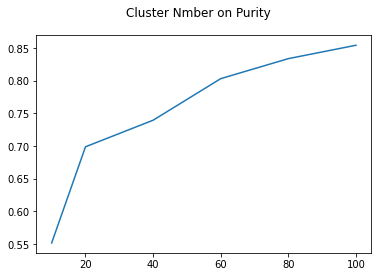

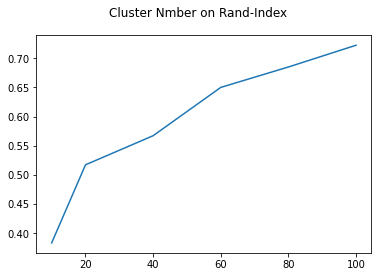

In [ ]:
clusters = [10, 20, 40, 60, 80, 100]
rand_indexes = []
purities = []
for i in clusters:
    k_means = MiniBatchKMeans(n_clusters=i)
    purity, rand_index = do_k_means(k_means, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)


plt.plot(clusters, purities)
plt.suptitle('Cluster Nmber on Purity')
plt.show()
plt.plot(clusters, rand_indexes)
plt.suptitle('Cluster Nmber on Rand-Index')
plt.show()

The above code is MiniBatch K-Means but with differnet values for `n_cluster`. <br>
We can see that with more clusters, we gain more purity and rand-index. <br>
However after a point, which is about 40 to 60, by increasing the number of clusters, we don't get much higher accuracy than the previos amounts. <br>
So we can infer that the ideal amount for K is a number between 40 to 60.


# Mean Shift
I used the `sklearn` library of python for the MeanShift algorithm. <br>
<br>
**Imortant Note:** <br> Clustering of 60000 data was taking too much time. (I waited for 2.5 hours and it didn't respond) <br>
Therfore I shorten the data and only used the first 5000 data for clustering, which takes less time and an acceptable output. 

In [ ]:
def do_mean_shift(mean_shift, labels = y_train[:1000], print_result = True):
    mean_shift.fit(X_train[:1000]) # به علت اینکه پردازش تمام 60 هزار داده با این روش مدت زیادی طول میکشد مجبوریم بخشی از داده ها را پردازش کنیم
    cluster_labels = infer_cluster_labels_mean_shift(mean_shift, labels) # تابعی برای پیدا کردن لیبل هر کلاستر
    data_labels = mean_shift.labels_
    predicted_labels = infer_data_labels(data_labels, cluster_labels) # تابعی برای پیدا کردن لیبل پیشبینی شده برای هر داده بعد از انجام کلاسترینگ

    if print_result:
        print('Number of clusters created: {}'.format(len(mean_shift.cluster_centers_)))
        print('Predicted labels: {}'.format(predicted_labels[:30]))
        print('Actual labels:    {}'.format(y_train[:30]))
        print('Purity: {}'.format(metrics.accuracy_score(labels, predicted_labels)))
        print('Rand Index: {}'.format(metrics.adjusted_rand_score(labels, predicted_labels)))

    return (metrics.accuracy_score(labels, predicted_labels), metrics.adjusted_rand_score(labels, predicted_labels), len(mean_shift.cluster_centers_))


def infer_cluster_labels_mean_shift(mean_shift, actual_labels):
    # لیبلی که در هر کلاستر بیشتر از بقیه تکرار شده را به عنوان لیبل آن کلاستر در نظر میگیریم
    inferred_labels = {}
    for i in range(len(mean_shift.cluster_centers_)):
        labels = []
        index = np.where(mean_shift.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

The Above functions are much like the functions for K-Means. <br>
`do_mean_shift()` is for performing the MeanShift algorithm which takes an intance of `MeanShift` class. (only accepts 5000 of data for clustering) <br>
And the `infer_cluster_labels_mean_shift()` is for detecting the label of cluster by iterating them and finding the most repeated value.



In [ ]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift(bandwidth=6, n_jobs=-1)
do_mean_shift(mean_shift)

Number of clusters created: 313
Predicted labels: [5 0 4 1 1 2 1 3 1 4 3 1 3 6 1 7 2 1 0 1 4 0 1 1 1 2 1 3 2 1]
Actual labels:    [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7]
Purity: 0.801
Rand Index: 0.5842000616515809


(0.801, 0.5842000616515809)

The above code is an example of MeanShift. <br>
the `bandwidth` parameter is the same as radius in the MeanShift algorithm. <br>
The `n_jobs` parameter is for performing the clustering faster. It means that we divide the clustering operation on all the availible cores of the processor. <br>
You can see that we have a high purity, but a normal rand-index. <br>
The reason is that the number of created clusters is high. <br>
By increasing the number of clusters we get better purity (because every element of a cluster is closer to each other) but the rand-index won't give a good grade for lots of clusters.

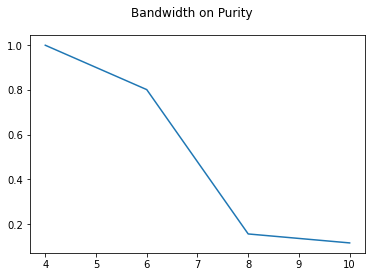

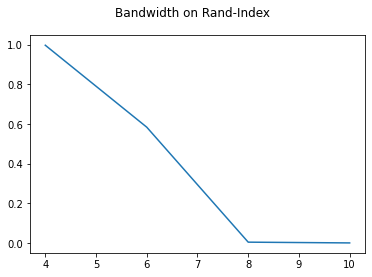

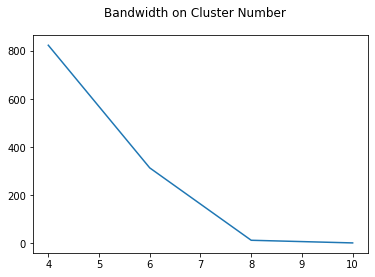

In [ ]:
bandwidths = [4, 6, 8, 10]
purities = []
rand_indexes = []
n_clusters = []

for i in bandwidths:
    mean_shift = MeanShift(bandwidth=i, n_jobs=-1)
    purity, rand_index, n_cluster = do_mean_shift(mean_shift, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)
    n_clusters.append(n_cluster)

plt.plot(bandwidths, purities)
plt.suptitle('Bandwidth on Purity')
plt.show()
plt.plot(bandwidths, rand_indexes)
plt.suptitle('Bandwidth on Rand-Index')
plt.show()
plt.plot(bandwidths, n_clusters)
plt.suptitle('Bandwidth on Cluster Number')
plt.show()


The above code is showing the effect of `bandwidth` parameter on purity, rand-index and cluster numbers. <br><br>
As you can see, if we give lower values to bandwidth, we will get lots of clusters, almost for each data we get one cluster ( I run this code for 1000 data, and we are getting 900 clusters with bandwidth 4), Therfore the purity and rand-index is at maximum level. <br><br>
On the other hand, if we choose a large bandwidth, all of our data will be put in one cluster. As you can see, after the bandwidth of 8, we will have a minimum purity, rand-index and number of clusters. <br><br>
from this plots we can infer that the best bandwidth for this dataset is 6. Because it has good accuracy and also an accetable cluster numbers.

# DB Scan
I used the `sklearn` library for the DBScan algorithm. <br>
<br>
Again, this library can not run the DBscan algorithm for all the data, so I choose only a fragment of the dataset to do the clustering.

In [ ]:
def do_dbscan(dbscan, labels = y_train[:1000], print_result = True):
    dbscan.fit(X_train[:1000]) # به علت اینکه پردازش تمام 60 هزار داده با این روش مدت زیادی طول میکشد مجبوریم بخشی از داده ها را پردازش کنیم
    cluster_labels = infer_cluster_labels_dbscan(dbscan, labels) # تابعی برای پیدا کردن لیبل هر کلاستر
    data_labels = dbscan.labels_
    predicted_labels = infer_data_labels(data_labels, cluster_labels) # تابعی برای پیدا کردن لیبل پیشبینی شده برای هر داده بعد از انجام کلاسترینگ

    if print_result:
        print('Number of clusters created: {}'.format(len(set(dbscan.labels_))))
        print('Predicted labels: {}'.format(predicted_labels[:30]))
        print('Actual labels:    {}'.format(y_train[:30]))
        print('Purity: {}'.format(metrics.accuracy_score(labels, predicted_labels)))
        print('Rand Index: {}'.format(metrics.adjusted_rand_score(labels, predicted_labels)))

    return (metrics.accuracy_score(labels, predicted_labels), metrics.adjusted_rand_score(labels, predicted_labels), len(set(dbscan.labels_)))


def infer_cluster_labels_dbscan(dbscan, actual_labels):
    # لیبلی که در هر کلاستر بیشتر از بقیه تکرار شده را به عنوان لیبل آن کلاستر در نظر میگیریم
    inferred_labels = {}
    for i in range(len(set(dbscan.labels_))):
        labels = []
        index = np.where(dbscan.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

Just like other algorithms, I defined some functions to perform the clustering algorithm. <br>
One for performing the clustering, one for infering the labels of each cluster

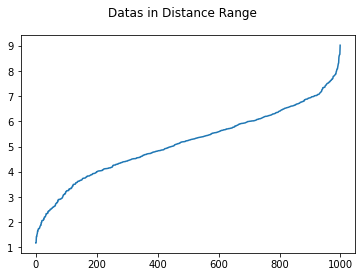

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train[:1000])
distances, indices = nbrs.kneighbors(X_train[:1000])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.suptitle('Datas in Distance Range')
plt.plot(distances)
plt.show()

The above code is for figuring out that which epsilon is ideal for our dataset. <br>
To estimate an ideal epsilon, I used the NearestNeighbor library. first I find the differences between all the data, then by sorting it, we can find that how much distance the datas have. <br>
For  example as you can see in the plot, lower than distance 4 and higher than distance 6 will decrease the accuracy of our cluster, because most of our data are between the range 4 to 6. <br>
In other words, less than distance 4, algorithm will count most of our data as noisy, and more than distance 6, algorithm will put most of our data in one cluster. <br>
In the next code we will try different epsilons between 4 to 6.

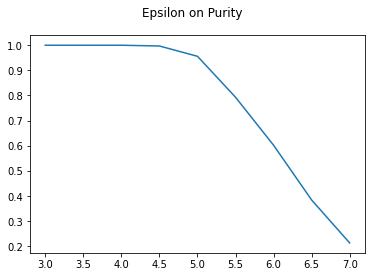

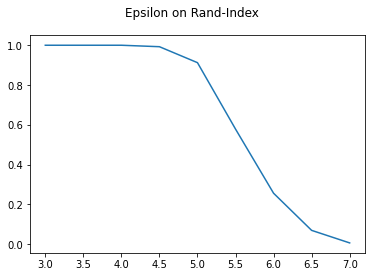

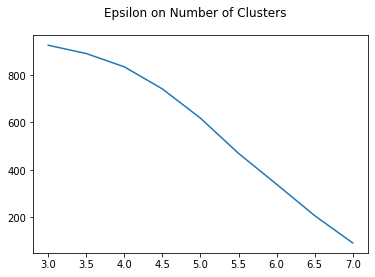

In [ ]:
from sklearn.cluster import DBSCAN

epsilons = [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]
rand_indexes = []
purities = []
n_clusters = []
for i in epsilons:
    dbscan = DBSCAN(eps=i, min_samples=1)
    purity, rand_index, n_cluster = do_dbscan(dbscan, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)
    n_clusters.append(n_cluster)


plt.plot(epsilons, purities)
plt.suptitle('Epsilon on Purity')
plt.show()
plt.plot(epsilons, rand_indexes)
plt.suptitle('Epsilon on Rand-Index')
plt.show()
plt.plot(epsilons, n_clusters)
plt.suptitle('Epsilon on Number of Clusters')
plt.show()

In the above code you can clearly see that for epsilons lower than 4, we had a cluster for each data, which results into high purity and rand-index but not usefull. and for epsilons more than 6 we get less clusters which results into bad accuracy and purity. <br>
But if we choose epsilons between 4 to 6, it's more ideal. and according to the plots, epsilon 5 is the best for this dataset.

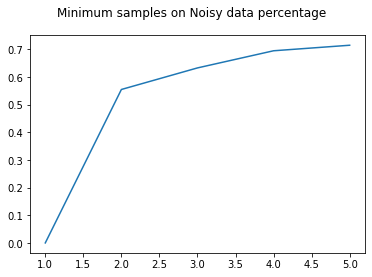

In [ ]:
min_samples = [1, 2, 3, 4, 5]
noise_percentage = []
for i in min_samples:
    dbscan = DBSCAN(eps=5, min_samples=i)
    dbscan.fit(X_train[:1000])
    index = np.where(dbscan.labels_ == -1) # noisy data are labeled as -1 in dbscan
    noise_percentage.append(len(index[0])/1000)


plt.plot(min_samples, noise_percentage)
plt.suptitle('Minimum samples on Noisy data percentage')
plt.show()

The above code shows the effect of `min_sample` attribute on the amount of noisy data recognized. <br>


# Agglomerative <br>
I used the `sklearn` library for different types of agglomerative.

In [ ]:
def do_agglomerative(agglomerative, labels = y_train[:1000], print_result = True):
    agglomerative.fit(X_train[:1000]) # به علت اینکه پردازش تمام 60 هزار داده با این روش مدت زیادی طول میکشد مجبوریم بخشی از داده ها را پردازش کنیم
    cluster_labels = infer_cluster_labels_agglomerative(agglomerative, labels) # تابعی برای پیدا کردن لیبل هر کلاستر
    data_labels = agglomerative.labels_
    predicted_labels = infer_data_labels(data_labels, cluster_labels) # تابعی برای پیدا کردن لیبل پیشبینی شده برای هر داده بعد از انجام کلاسترینگ

    if print_result:
        print('Number of clusters created: {}'.format(agglomerative.n_clusters_))
        print('Predicted labels: {}'.format(predicted_labels[:30]))
        print('Actual labels:    {}'.format(y_train[:30]))
        print('Purity: {}'.format(metrics.accuracy_score(labels, predicted_labels)))
        print('Rand Index: {}'.format(metrics.adjusted_rand_score(labels, predicted_labels)))

    return (metrics.accuracy_score(labels, predicted_labels), metrics.adjusted_rand_score(labels, predicted_labels), agglomerative.n_clusters_)


def infer_cluster_labels_agglomerative(agglomerative, actual_labels):
    # لیبلی که در هر کلاستر بیشتر از بقیه تکرار شده را به عنوان لیبل آن کلاستر در نظر میگیریم
    inferred_labels = {}
    for i in range(agglomerative.n_clusters_):
        labels = []
        index = np.where(agglomerative.labels_ == i)

        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

Define required function for performing and infering labels for agglomerative clustering.

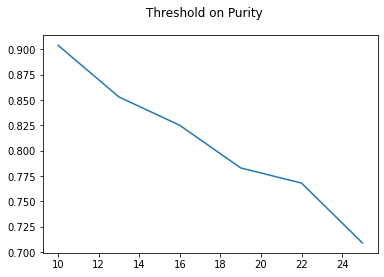

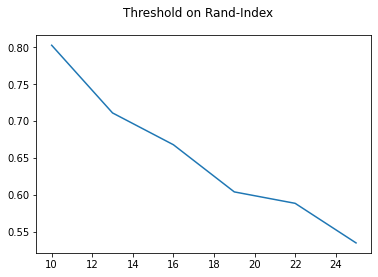

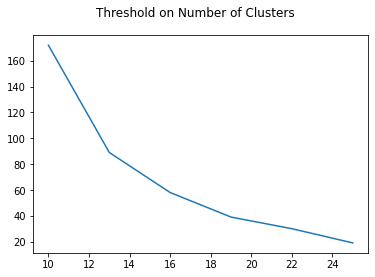

In [ ]:
from sklearn.cluster import AgglomerativeClustering

thresholds = [10, 13, 16, 19, 22, 25]
rand_indexes = []
purities = []
n_clusters = []
for i in thresholds:
    clustering = AgglomerativeClustering(distance_threshold=i, n_clusters=None, compute_full_tree=True)
    purity, rand_index, n_cluster = do_agglomerative(clustering, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)
    n_clusters.append(n_cluster)


plt.plot(thresholds, purities)
plt.suptitle('Threshold on Purity')
plt.show()
plt.plot(thresholds, rand_indexes)
plt.suptitle('Threshold on Rand-Index')
plt.show()
plt.plot(thresholds, n_clusters)
plt.suptitle('Threshold on Number of Clusters')
plt.show()

As you can see, by increasing the threshold, we gain less purity and rand-index. <br>
The ideal amount for threshold is between 14 to 18, because the number of clusters are acceptable and also the purity and rand-index is very good. <br>
Up to now we have gained the best result of our dataset with this algorithm, 60 clusters, 0.825 purity and 0.7 rand-index

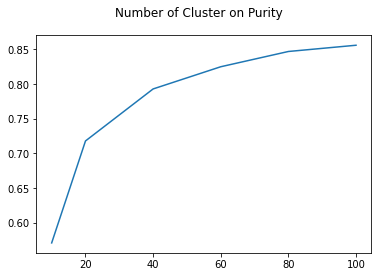

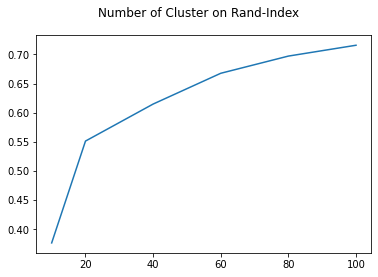

In [ ]:
n_clusters = [10, 20, 40, 60, 80, 100]
rand_indexes = []
purities = []
for i in n_clusters:
    clustering = AgglomerativeClustering(n_clusters=i)
    purity, rand_index, n_cluster = do_agglomerative(clustering, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)


plt.plot(n_clusters, purities)
plt.suptitle('Number of Cluster on Purity')
plt.show()
plt.plot(n_clusters, rand_indexes)
plt.suptitle('Number of Cluster on Rand-Index')
plt.show()

Another way of agglomerative algorithm is to define the maximum number of clusters, just like K-means, and the algorithm will do clustering until number of clusters reach the limit. <br>
You can see that after 20 clusters, we won't gain that much purity and rand-index comparing to previous numbers. <br>

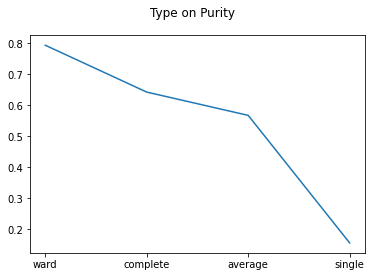

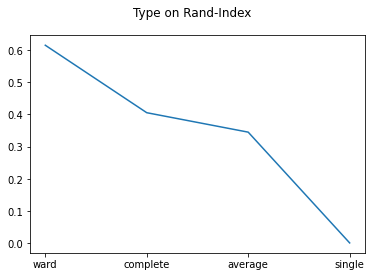

In [ ]:
types = ['ward', 'complete', 'average', 'single']
rand_indexes = []
purities = []
for t in types:
    clustering = AgglomerativeClustering(n_clusters=40, linkage=t)
    purity, rand_index, n_cluster = do_agglomerative(clustering, print_result=False)
    rand_indexes.append(rand_index)
    purities.append(purity)


plt.plot(types, purities)
plt.suptitle('Type on Purity')
plt.show()
plt.plot(types, rand_indexes)
plt.suptitle('Type on Rand-Index')
plt.show()

The agglomerative algorithm has 4 different types. <br>
The default value for the type is 'ward' and up to now we have used this type for our previous examples. <br>
Here in this example we can see the effect of the type on the accuracy of our clustering. <br>
As you can see the complete and average doesn't have much difference, the ward type is the best and the single type is the worst.